## 1. Importing Necessary Libraries

In [312]:
# Import packages
%matplotlib inline
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pickle

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from itertools import chain
from stdnum import py
from pygments.lexers import go
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.pipeline import Pipeline
%matplotlib inline
import lightgbm as lgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import auc

## 2. Importing Dataset

In [313]:
data = pd.read_csv(r'dataset_breast_cancer.csv')

# show the data of how many rows and columns
print("Data Shape - ", data.shape)

Data Shape -  (569, 33)


# 3. Read the Data

In [314]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [315]:
# description of the current data set
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


From the first look in the data description we can see that :
    - B = benign is the most frequent value in our target columns
    - Unnamed: 32nd columns is an empty column

In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

According to the data, all features are numerical values except the target value diagnosis which is an object: M = malignant, B = benign.

# 4. EDA (Exploratory Data Analysis)

## 4.1 Drop Out Unnecessary Column

As the 32nd colum is empty, we will drop it out.

In [317]:
data = data.drop('Unnamed: 32',axis=1)

## 4.2 Check the Missing Value

In [318]:
missing_values = data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


From the tables, it shows that the data is cleaned and no missing value.

In [319]:
# transformation of type of the target value to numerical
le = preprocessing.LabelEncoder()
data.diagnosis = le.fit_transform(data.diagnosis)
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

Diagnosis:

M = malignant => 1
B = benign => 0

Let's also drop out an id column since we also don't need it.

In [320]:
# drop the id columns
data = data.drop('id',axis=1)

## 4.3 Correlation Matrix with Heatmap

A graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value
from -1 to 1.

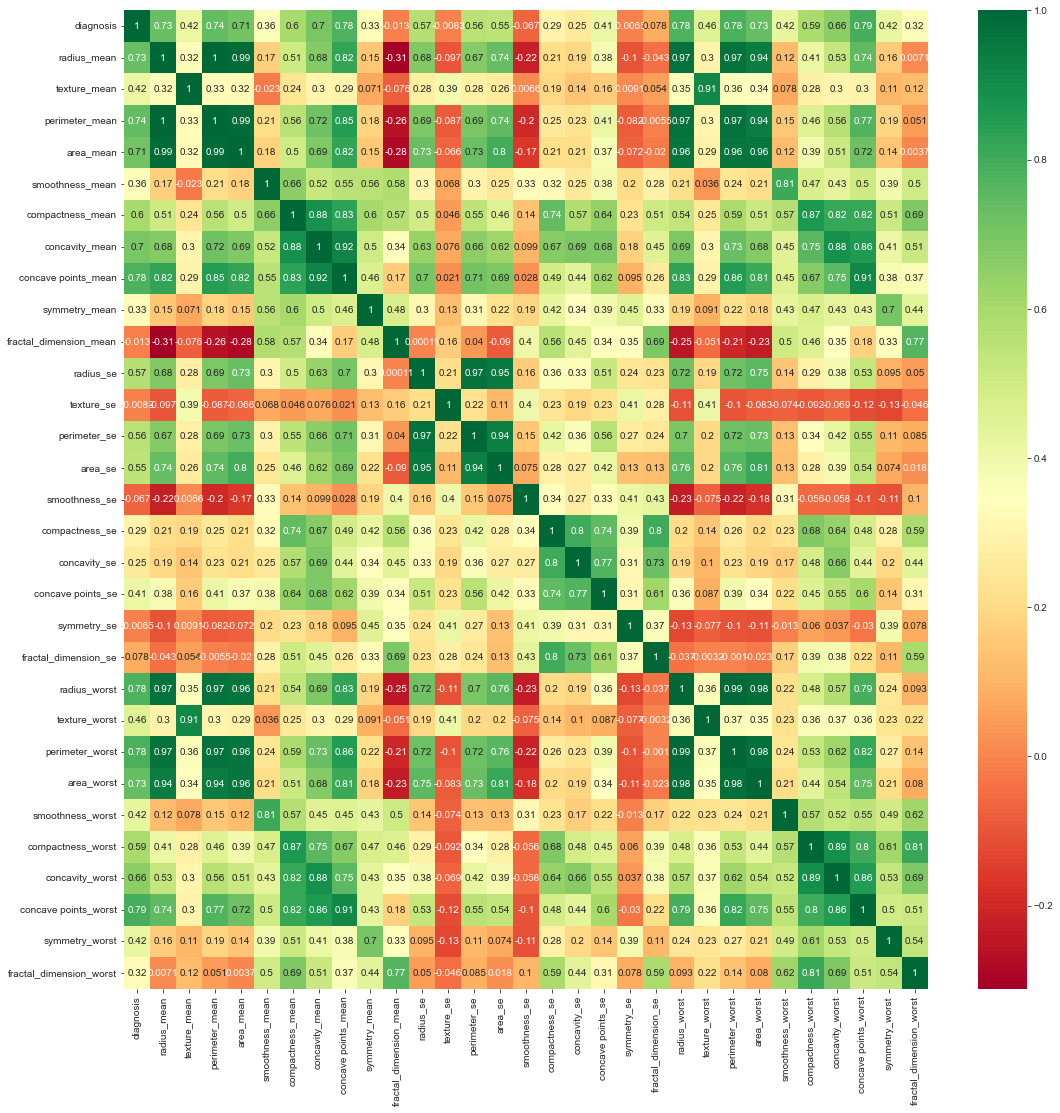

In [321]:
#independent columns
X = data.iloc[:, 0:20]
#target column
y = data.iloc[:, -1]

#get correlations of each features in dataset
corrmatrix = data.corr()
top_corr_features = corrmatrix.index
plt.figure(figsize=(18, 18))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

From the above correlation heatmap, we could get some of the following information:

- Variables such as radius_worst & radious_mean, radius_worst & parameter_mean, are having strong positive correlation, just to name a few.
- Variables such as radius_worst & smoothness_se, and fractal_dimension_mean & radious_mean are having strong negative correlations: also, just to name a few.
- overall, to view this correlation graph: there are several variables that have no correlation and whose correlation value is near 0, while whose that have strong correlation is closer to 1.

## 4.4 Positive Correlated Features

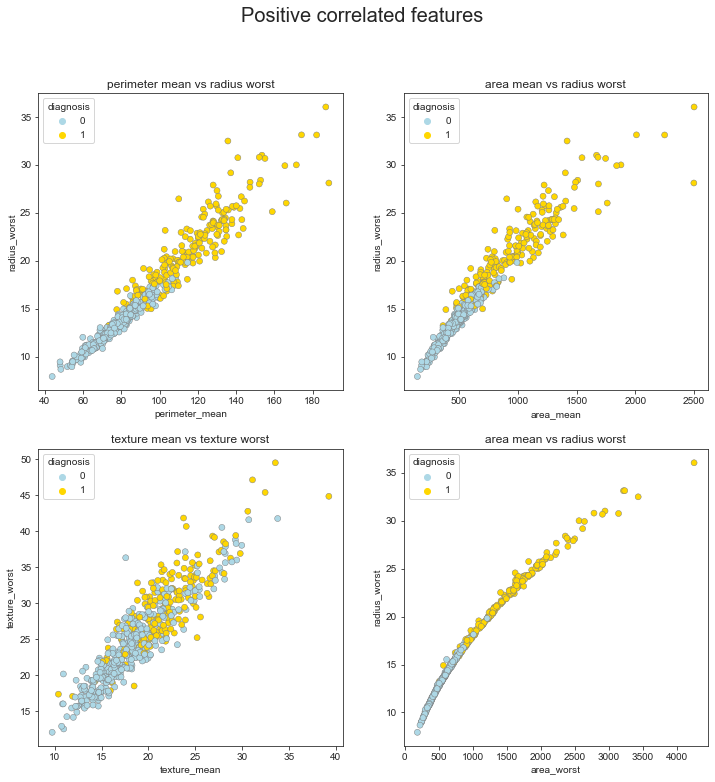

In [322]:
# B = benign => 0
# M = malignant => 1
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

## 4.5 Uncorrelated Features

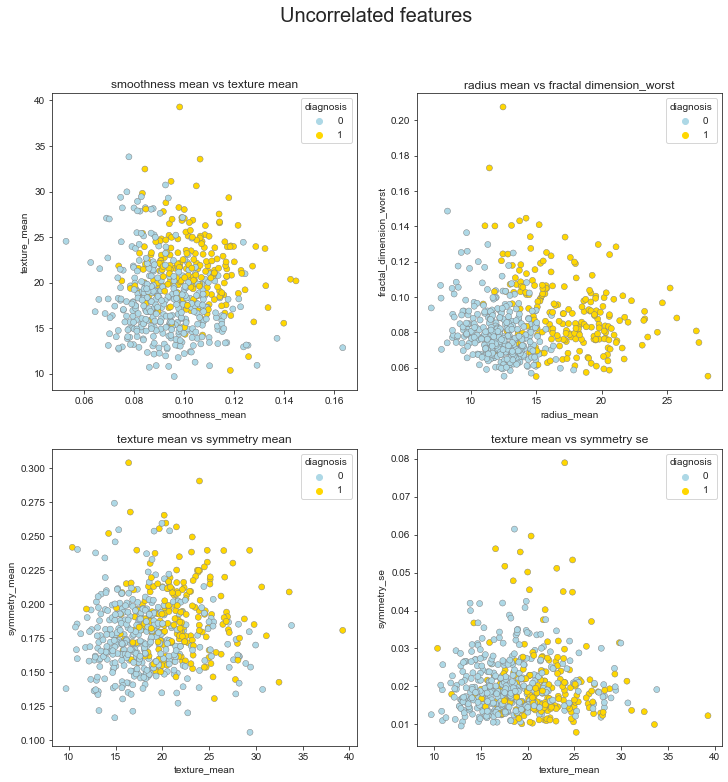

In [323]:
# B = benign => 0
# M = malignant => 1

fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

## 4.6 Negative Correlated Features

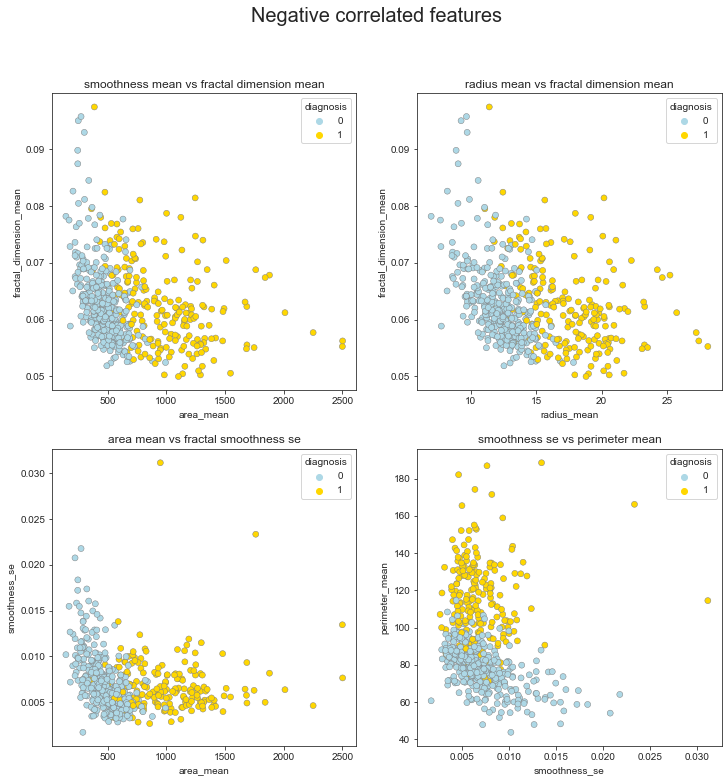

In [324]:
# B = benign => 0
# M = malignant => 1

fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

# 5. Data Vizualisation

## 5.1 Diagnosis

Text(0.5, 1.0, 'Number of diagnosis ')

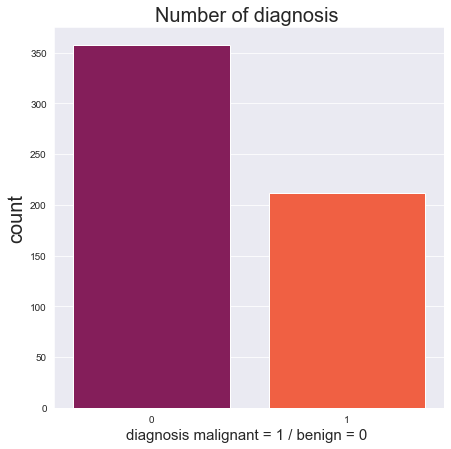

In [325]:
#bar chart
plt.rcParams['figure.figsize']=7,7
sns.set_style("darkgrid")
ax = sns.countplot(x=data.diagnosis , palette = "rocket", saturation =1.5)
plt.xlabel("diagnosis malignant = 1 / benign = 0 ", fontsize = 15 )
plt.ylabel("count", fontsize = 20)
plt.title('Number of diagnosis ', fontsize = 20)

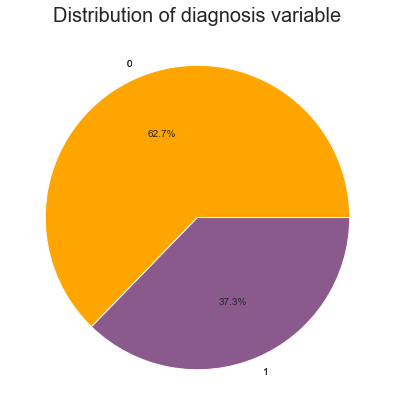

In [326]:
#pie chart in percentile
# B = benign => 0
# M = malignant => 1
label=data.diagnosis.value_counts().index
count=data.diagnosis.value_counts().values
color = ['orange', '#8B5A8C']

plt.pie(count,labels=label)
plt.title('Distribution of diagnosis variable', fontsize = 20)
plt.figure(1, figsize=(20,15))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%')
plt.show()

Ploting the histogram of these values so we can better observer their values and data distribution. In order to do so, we are going to separate, for each histogram, the values depending on the diagnosis column.

## 5.2 Features vs Diagnosis

Observations:
- mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
- mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

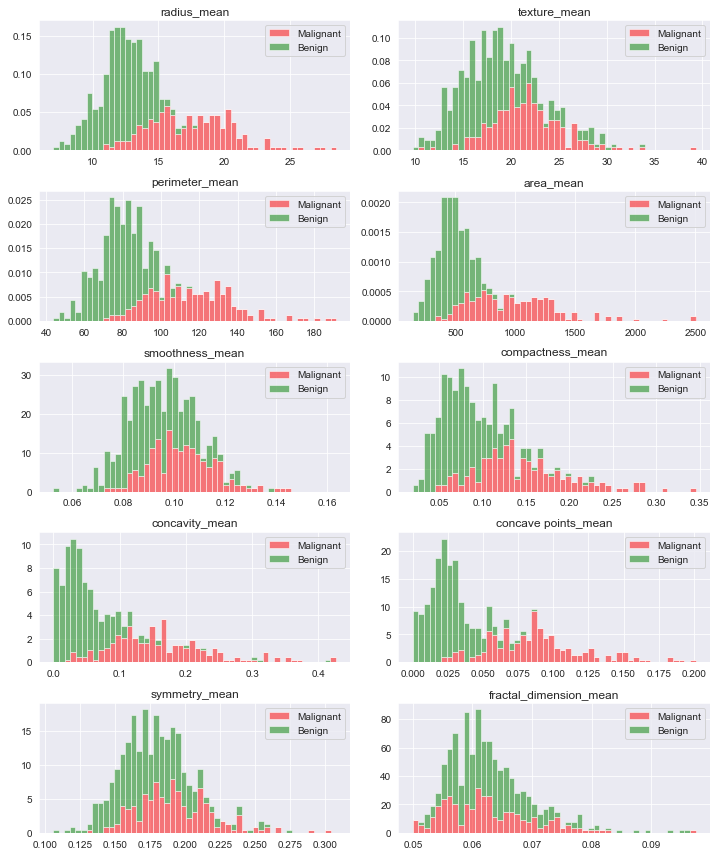

In [327]:
# B = benign => 0
# M = malignant => 1

features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis'] ==1]
dfB=data[data['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['Malignant','Benign'], color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

From these ten graphs we can observe, these features might be useful in predicting whether a patient has cancer or not due to the distinct grouping between malignant and benign. We can also see the most frequent malignant value of these features under each graph, although visually they may vary since we might not have an optimal bin width, bust most of them match with the values histograms show.

# 6 Feature Selection

[0.05015712 0.01815839 0.06325131 0.0491037  0.01004358 0.02049939
 0.06884835 0.06943233 0.00753331 0.00661896 0.01639417 0.00762587
 0.0231572  0.04441215 0.00607639 0.00758695 0.00888645 0.01403404
 0.0052126  0.0069759  0.07608121 0.02567806 0.09361253 0.08321285
 0.02055806 0.03107944 0.04574754 0.09486462 0.01388625 0.0112713 ]


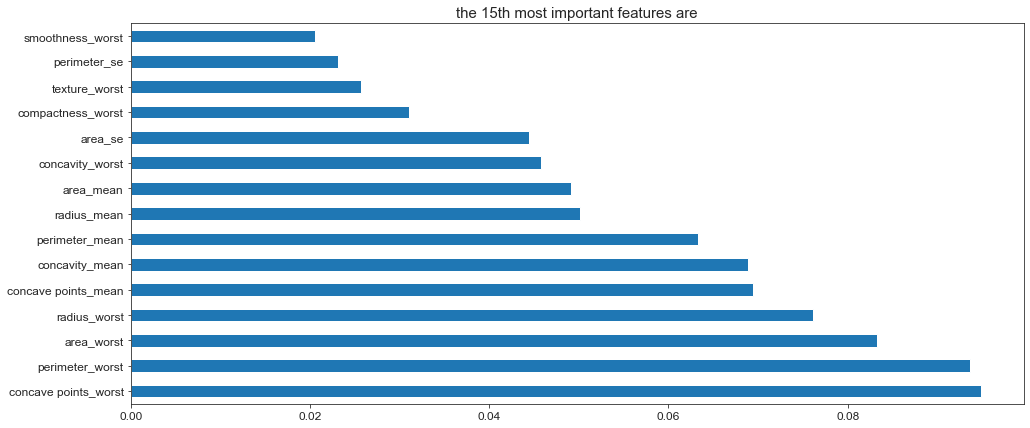

In [328]:
# B = benign => 0
# M = malignant => 1

plt.rcParams['figure.figsize']=16,7
sns.set_style("ticks")

x = data.drop('diagnosis',axis=1)
y = data.diagnosis

model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=x.columns)

feat_importance.nlargest(15).plot(kind='barh', fontsize=12)
plt.title('the 15th most important features are', fontsize=15)
plt.show()

Let's check our current column name.

In [329]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Drop out unimportant features, and choose just the best 15 according the bar chart.

In [330]:
data=data.drop(['texture_mean','smoothness_mean','compactness_mean','symmetry_mean','perimeter_se','compactness_se','concavity_se','concave points_se','smoothness_worst','symmetry_worst','fractal_dimension_worst', 'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1)

In this section, we manipulate the data to prepare it for modeling. There are three main steps that we can take:

- Splitting the data into a training set, a validation set (to help me develop my models), and a test set (to help me evaluate the final version of each model);
- Resampling the training set so that all classes are equally represented;
- Scaling the data, which will help ensure that PCA and some machine learning algorithms work properly;
- Principal Components Analysis (PCA), which will reduce the dimensions of the data and eliminate any multicollinearity.

We do all these steps first to the training data so that we can check the outcome at each step. Once that's done, we put the essential preprocessing steps into a pipeline that I can use to transform the validation and test sets.

## 6.1 Train-Validation-Test Split

We will take 80% of the total dataset to use as training data. The remaining 20% of the original dataset will be devoted half of that to validation and half to be used as a true holdout set, which will be used to evaluate the final versions of each of my models.

In [331]:
# Split first into training and test datasets
X = data.drop('diagnosis', axis=1)
y = data.diagnosis


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [332]:
# Split again into validation and true holdout (test) datasets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                random_state=1,
                                                stratify=y_test)

In [333]:
# Examine shapes of the subsets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(455, 14) (455,)
(57, 14) (57,)
(57, 14) (57,)


As we will compare model performance on the raw data and the preprocessed version, so at this point (before preprocessing) we will save copies for later used.

In [334]:
# Save raw copies of train and validation sets before further preprocessing
X_train_raw = X_train.copy()
y_train_raw = y_train.copy()

X_val_raw = X_val.copy()
y_val_raw = y_val.copy()

## 6.2 Resampling

The preprocessing step is to deal with the class imbalance. As we can see earlier Benign: 0 is more than 60% pf the data set while Malignant:1 is only 30%
The overall strategy is to under-sample the bigger classes and over-sample the smaller ones so that both classes are the same size as the median-sized class.

First, Let's put the training data back into one DataFrame to make things a little easier.

In [335]:
# Concatenate X_train and y_train for resampling
df_train = pd.concat([X_train, y_train], axis=1)
print(len(df_train))
df_train.head()

455


,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
195,12.91,82.53,516.4,0.03873,0.02377,0.1942,15.750,13.88,22.00,90.81,600.6,0.1506,0.1764,0.08235,0
560,14.05,91.38,600.4,0.04462,0.04304,0.3645,29.840,15.30,33.17,100.20,706.7,0.2264,0.1326,0.10480,0
544,13.87,89.77,584.8,0.03688,0.02369,0.2720,23.120,15.05,24.75,99.17,688.6,0.2037,0.1377,0.06845,0
495,14.87,96.12,680.9,0.06824,0.04951,0.2323,21.840,16.01,28.48,103.90,783.6,0.1388,0.1700,0.10170,0
527,12.34,78.94,468.5,0.02958,0.02647,0.1166,8.955,13.61,19.27,87.22,564.9,0.2074,0.1791,0.10700,0


In [336]:
# Check for class imbalance
df_train.diagnosis.value_counts()

0    285
1    170
Name: diagnosis, dtype: int64

Let's use RandomUnderSampler and SMOTE to undersample the larger classes and oversample the smaller one.

In [337]:
# Randomly undersample the larger classes
rus = RandomUnderSampler(random_state=2,
                         sampling_strategy={0:170, 1:170,})

X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Check class counts
Counter(y_rus)

Counter({0: 170, 1: 170})

In [338]:
# Randomly oversample the smaller classes
smote = SMOTE(random_state=2, sampling_strategy={0:170, 1:170})

X_resampled, y_resampled = smote.fit_resample(X_rus, y_rus)

# Check class counts
Counter(y_resampled)

Counter({0: 170, 1: 170})

The final count above shows that the classes are now balanced.

## 6.3 Scaling

The next transformation is to standardize the features.

In [339]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
X_scaled = pd.DataFrame(X_scaled)

In [340]:
# Check the results
X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,3.400000e+02,340.000000,3.400000e+02
mean,1.671865e-16,-2.089832e-16,3.343731e-16,4.179663e-17,-1.671865e-16,-1.671865e-16,-1.671865e-16,1.671865e-16,-7.523394e-16,6.687461e-16,1.253899e-16,4.179663e-17,0.000000,2.507798e-16
std,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474e+00,1.001474,1.001474e+00
min,-2.105653e+00,-2.058070e+00,-1.531661e+00,-1.219892e+00,-1.364336e+00,-1.131877e+00,-8.342892e-01,-1.795846e+00,-2.156398e+00,-1.758942e+00,-1.290713e+00,-1.388356e+00,-1.378651,-1.845322e+00
25%,-7.317808e-01,-7.396325e-01,-7.247112e-01,-7.994030e-01,-8.112024e-01,-6.881865e-01,-5.923597e-01,-7.558534e-01,-7.463687e-01,-7.918375e-01,-7.164998e-01,-7.261254e-01,-0.772652,-8.244592e-01
50%,-1.976548e-01,-1.803810e-01,-2.977927e-01,-2.723864e-01,-2.724760e-01,-3.216896e-01,-3.828120e-01,-2.021539e-01,-2.857914e-02,-2.147187e-01,-2.980435e-01,-2.609313e-01,-0.136887,-1.004898e-01
75%,6.592426e-01,6.445077e-01,5.623804e-01,6.278587e-01,7.179306e-01,3.752171e-01,2.620865e-01,6.245436e-01,7.091712e-01,6.092442e-01,4.904150e-01,5.284055e-01,0.564913,7.758660e-01
max,3.414955e+00,3.522162e+00,4.757733e+00,3.799257e+00,3.229306e+00,7.288812e+00,1.064360e+01,3.617892e+00,3.699296e+00,3.778916e+00,5.215889e+00,4.495674e+00,4.142262,2.323366e+00


The features have now been standardized so that they all have a mean of 0 and a standard deviation of 1.

Let's just get a quick visual confirmation of this change with some histograms.

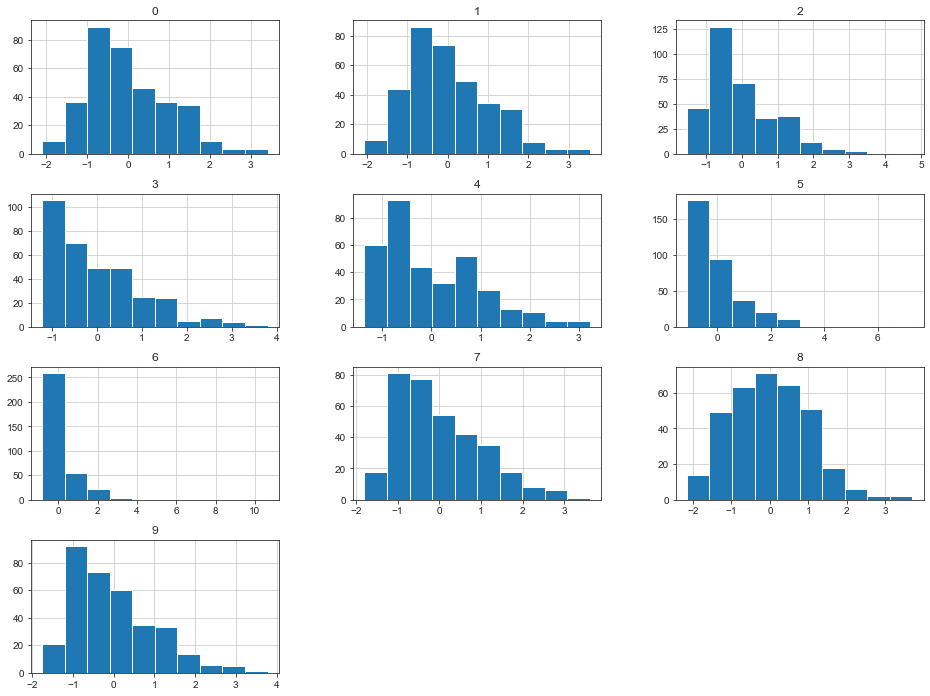

In [341]:
# Visualize the distributions again
X_scaled.loc[:,:9].hist(figsize=(16, 12));

## 6.4 PCA

Principal Components Analysis takes the features we have and tries to combine them in ways that maximize the amount of variance the components can explain in the data.
PCA can help us avoid the negative effects of having numerous features while still allowing us to account for as much variance as possible.

We aim to find a number of components that will explain at least 80% of the variance in the data.
First, let's see how much variance we can explain with a wide range of components.

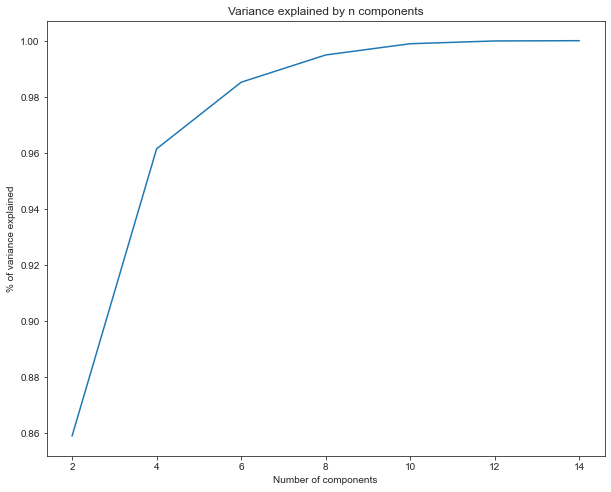

In [342]:
from sklearn.decomposition import PCA

# Try several numbers of components to explain 80% of variance
comps = [2, 4, 6, 8, 10, 12, 14]
var_sums = []
for comp in comps:
    pca = PCA(n_components=comp)
    pca.fit_transform(X_scaled)
    var_sums.append(np.sum(pca.explained_variance_ratio_))

# Visualize results
plt.figure(figsize=(10,8))
plt.plot(comps, var_sums)
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')
plt.title('Variance explained by n components')
plt.xticks([2, 4, 6, 8, 10, 12, 14])
plt.show();

Fourteenth components seem to capture about 99% of the variance in the data, which aligns with what we expected based on the feature importance plot above.

### Preprocessing pipeline

Pipeline is used here so that it can easily transform validation and test sets in the same way as  training set without leaking data from one set to another.

In [343]:
# Build a pipeline for the preprocessing steps
pipe_prepro = Pipeline([('scaler', StandardScaler()),
                        ('pca', PCA(n_components=13))])

Fit the preprocessing pipeline to the training data which has been resampled, then use the pipeline to transform the validation and test sets separately.

In [344]:
#Fit the pipeline and transform the training dataset
X_train_trans = pipe_prepro.fit_transform(X_resampled)

In [345]:
# Use the pipeline to transform the validation and test datasets
X_val_trans = pipe_prepro.transform(X_val)
X_test_trans = pipe_prepro.transform(X_test)

In [346]:
# Apply naming conventions to the un-preprocessed labels
y_train_res = y_resampled.copy()

# 7. Define Functions

This part is essential to measure the performance of a model : roc, cross validation, learning curve.

## 7.1. Confusion Matrix and Show Metrics

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

true positive (TP) : Malignant tumour correctly identified as malignant
true negative (TN) : Benign tumour correctly identified as benign
false positive (FP) : Benign tumour incorrectly identified as malignant
false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :

Accuracy : (TP +TN) / (TP + TN + FP +FN)
Precision : TP / (TP + FP)
Recall : TP / (TP + FN)

In [347]:
# Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Show metrics
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

## 7.2 Precision – Recall curve

The precision-recall curve shows the tradeoff between precision and recall for different threshold

In [348]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

## 7.3. ROC curve

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [349]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## 7.4  Learning Curve

The Learning curve determines cross-validated training and test scores.

In [350]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

## 7.5 Cross Validation Metrics

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In [351]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [352]:
# Define a function to print selected model metrics
def print_metrics(y_true, y_pred):
    '''Print accuracy score, confusion matrix, and classification report.

    Keyword arguments:
    y_true: groud-truth labels
    y_pred: predicted labels

    Dependencies:
    sklearn.metrics.accuracy_score
    sklearn.metrics.confusion_matrix
    sklearn.metrics.classification_report
    '''
    acc_score = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print('Accuracy:', acc_score)
    print('-------')
    print('Confusion matrix:')
    print(conf_matrix)
    print('-------')
    print('Classification report:')
    print(class_report)

# 8. Machine Learning Applications

X = features
y = diagnosis

In [353]:
# Def X and Y
X = data.drop('diagnosis', axis=1)
y = data.diagnosis

In [354]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [355]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = random_state)

## 8.1 Support Vector Machines



In [356]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using this model is', best_parameters)
print('The best score for using this model is', CV_model_svm.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
The best parameters for using this model is {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
The best score for using this model is 0.974


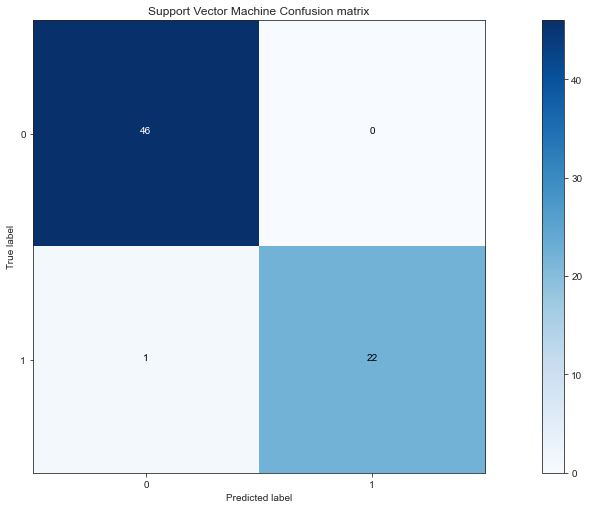

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


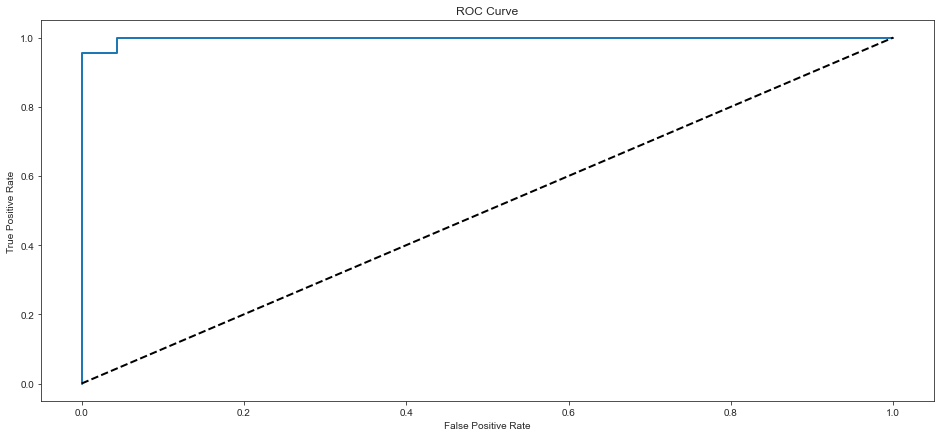

In [357]:
#Log with best hyperparameters
CV_model_svm = SVC(C=100.0, gamma = 0.01, kernel = 'rbf')


CV_model_svm.fit(X_train, y_train)
y_pred = CV_model_svm.predict(X_test)
y_score = CV_model_svm.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Support Vector Machine Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

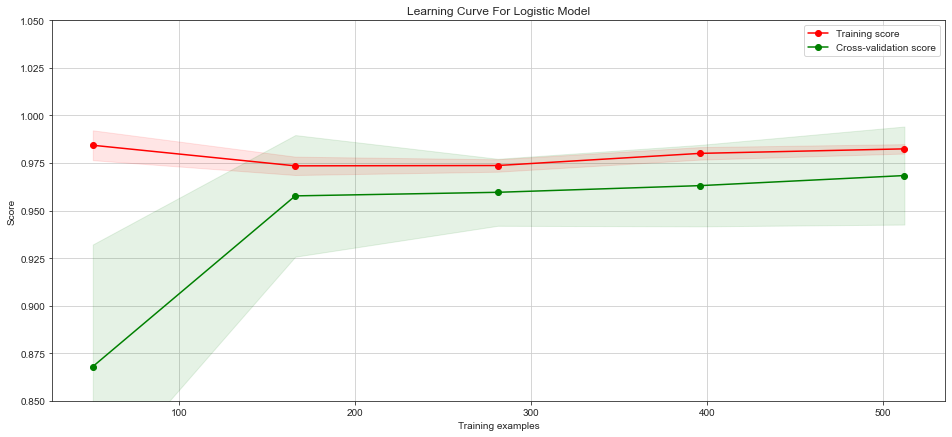

In [358]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [359]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.2 KNN

In [363]:
# Find best hyperparameters (accuracy)
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

model_knn = KNeighborsClassifier()
param_grid = dict(n_neighbors = k_range, weights = weight_options)

CV_model_knn = GridSearchCV(estimator = model_knn, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_knn.fit(X_train, y_train)

best_parameters = CV_model_knn.best_params_
print('The best parameters for using this model is', best_parameters)
print('The best score for using this model is', CV_model_knn.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best parameters for using this model is {'n_neighbors': 4, 'weights': 'uniform'}
The best score for using this model is 0.968


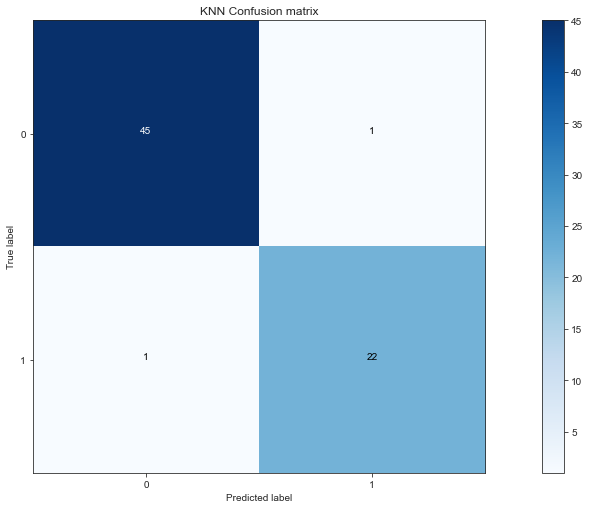

Accuracy  =     0.971
Precision =     0.957
Recall    =     0.957
F1_score  =     0.957


TypeError: Singleton array 0.9710144927536232 cannot be considered a valid collection.

In [364]:
#Log with best hyperparameters
CV_model_knn = KNeighborsClassifier(n_neighbors= 4, weights= 'uniform')


CV_model_knn.fit(X_train, y_train)
y_pred = CV_model_knn.predict(X_test)
y_score = CV_model_knn.score(X_test, y_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='KNN Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

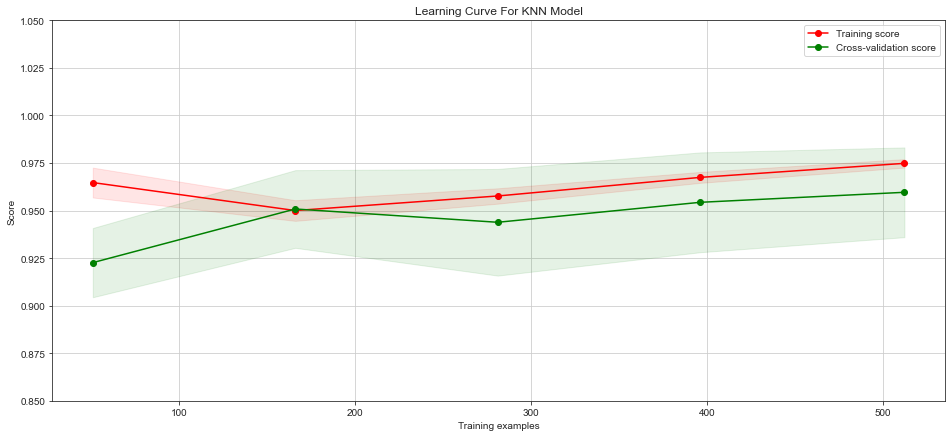

In [365]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_knn, 'Learning Curve For KNN Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.3 Logistic Regression

In [371]:
# Find best hyperparameters (accuracy)
model_lr = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_model_lr = GridSearchCV(estimator = model_lr, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_lr.fit(X_train, y_train)

best_parameters = CV_model_lr.best_params_
print('The best parameters for using Logistic Regression model is', best_parameters)
print('The best score for using this model is', CV_model_svm.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
The best parameters for using Logistic Regression model is {'C': 10, 'penalty': 'l2'}


AttributeError: 'SVC' object has no attribute 'best_score_'

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_lr, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.4 Random Forest

In [369]:
# Find best hyperparameters (accuracy)
model_rf = RandomForestClassifier(random_state = random_state)
params = {'n_estimators': [10, 100],
          'max_features': [2, 4, 6, 8, 10, 12, 14],
          'max_depth': [20, 25]}


CV_model_rf = GridSearchCV(estimator = model_rf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')

best_parameters = CV_model_rf.best_params_

print('The best parameters for using this model is', best_parameters)
print('The best score for using this model is', CV_model_svm.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [366]:
#Log with best hyperparameters
CV_model_rf = RandomForestClassifier(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_rf.fit(X_train, y_train)
y_pred = CV_model_rf.predict(X_test)
y_score = CV_model_rf.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

KeyError: 'C'

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf1.pickle', 'wb') as f:
    pickle.dump(CV_model_rf, f, pickle.HIGHEST_PROTOCOL)

### 8.4.1 Fit the model

Instantiate a Random Forest classifier with default parameters, fit it to the training data, and take a look at the accuracy score, confusion matrix, and classification report to see how it performed.

In [ ]:
# Fit and score a baseline RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_resampled, y_resampled)

train_pred = model_rf.predict(X_resampled)

print_metrics(y_resampled, train_pred)

the acuracy score is quite height—and it probably means that the model is overfitting on the training data a bit, lets check validation score.

In [ ]:
# Validate
val_pred = model_rf.predict(X_val_raw)

print_metrics(y_val_raw, val_pred)

Next let's see how trying other parameters performs, not just the defaults, for the Random Forest affects performance.

### 8.1.2 Tune parameters with GridSearchCV

In [ ]:
# Use GridSearchCV to find best parameters for the Random Forest
params = {'n_estimators': [10, 100],
          'max_features': [2, 4, 6, 8, 10, 12, 14],
          'max_depth': [20, 25]}

grid_rf = GridSearchCV(model_rf, params, cv=3, n_jobs=-1)

grid_rf.fit(X_resampled, y_resampled)

In [ ]:
GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       param_grid={'n_estimators': [10, 100], 'max_features': [30, 40, 54], 'max_depth': [20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# View best score and parameters
print('Best score:', grid_rf.best_score_)
print('Best params:', grid_rf.best_params_)

The best option found by the grid search had an accuracy score of 96.2% with the parameters listed above.

Let's examine how the best Random Forest model performs when predicting on the training, validation, and test datasets.

In [ ]:
# View training metrics for the best model
y_pred = grid_rf.predict(X_resampled)
print_metrics(y_resampled, y_pred)

In [ ]:
# View validation metrics for the best model
y_pred = grid_rf.predict(X_val_raw)
print_metrics(y_val_raw, y_pred)

The optimized Random Forest scored 95% on the validation set. The confusion matrix and classification report show that the model had its worst precision score for class 1; it seems to be having trouble catching all the instances of that class. We can compare subsequent models to see if any do better at catching that class.

### 8.1.3 Evaluating the best-unpreprocessed Random Forest classifier

In [ ]:
# Create and fit the model pipeline
pipe_rf = Pipeline([('forest1', RandomForestClassifier(max_depth=25,
                                                            max_features=30,
                                                            n_estimators=100))
                        ])

pipe_rf.fit(X_resampled, y_resampled)
Pipeline(memory=None,
     steps=[('forest1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

# View metrics for training data
y_pred = pipe_rf.predict(X_resampled)
print_metrics(y_resampled, y_pred)

In [ ]:
# View metrics for validation data
y_pred = pipe_rf.predict(X_val_raw)
print_metrics(y_val_raw, y_pred)

In [ ]:
# View metrics for test data
y_pred_test_rf = pipe_rf.predict(X_test)
print_metrics(y_test, y_pred_test_rf)

The model's performance on the test dataset is quite close to its performance on the validation and training sets, leading me to believe that the model is not overfitting on the training data. Class 1 is still the one where the model doesn't perform as well, but for every other class, performance is pretty good.

One last step to save me time in the future is to "pickle" this model, save a copy of the model that is already trained and ready to use for prediction.

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.5 Decision Tree

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using Decision Tree model is', best_parameters)
print('The best score for using Decision Tree model is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For Decision Tree Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.6 GBM

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using GBM model is', best_parameters)
print('The best score for using GBM model is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For GBM Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.7 LightGB

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using LightGB model is', best_parameters)
print('The best score for using LightGB model is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For LightGB Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.8 AdaBoost

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using AdaBoost model is', best_parameters)
print('The best score for using AdaBoost model is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For AdaBoost Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.9 XGBoost

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using XGBoost nodel is', best_parameters)
print('The best score for using XGBoost modeö is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For XGBoost Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.10 CatBoost

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using CatBoost model is', best_parameters)
print('The best score for using CatBoost model is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For CatBoost Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

## 8.11 Naive Bayes

In [ ]:
# Find best hyperparameters (accuracy)
model_svm = SVC(random_state = random_state)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


CV_model_svm = GridSearchCV(estimator = model_svm, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, error_score='raise')
CV_model_svm.fit(X_train, y_train)

best_parameters = CV_model_svm.best_params_
print('The best parameters for using Naive Bayes model is', best_parameters)
print('The best score for using Naive Bayes model is', CV_model_svm.best_score_)

In [ ]:
#Log with best hyperparameters
CV_model_lr = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = random_state)

CV_model_lr.fit(X_train, y_train)
y_pred = CV_model_lr.predict(X_test)
y_score = CV_model_lr.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm,
                      classes=class_names,
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_model_svm, 'Learning Curve For Naive Bayes Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

In [ ]:
# Pickle the model
with open('rf.pickle', 'wb') as f:
    pickle.dump(pipe_rf, f, pickle.HIGHEST_PROTOCOL)

# 9. Displaying Best Model

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Decision Tree', 'LightGBM', 'GBM', 'GBM2', 'AdaBoost',
              'XGBoost', 'CatBoost', 'Naive Bayes'],
    'Score': [acc_svm, acc_knn, acc_logreg, acc_randomforest, acc_dt, acc_lgb,
              acc_gbm, acc_gbm2, acc_adaboost, acc_xgboost, acc_catboost, acc_nb]})
models.sort_values(by='Score', ascending=False)
plt.rcParams['figure.figsize'] = 15, 6
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette="rocket", saturation=1.5)
plt.xlabel("Classifier Models", fontsize=20)
plt.ylabel("% of Accuracy", fontsize=20)
plt.title("Accuracy of different Classifier Models", fontsize=20)
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.02), ha='center', fontsize='x-large')
plt.show()